## 制定問題

首先，要先問老闆：商業目標到底是什麼  
The first question to ask your boss is what exactly the business objective is. 

How does the company expect to use and benefit from this model? 

Knowing the objective is important because it will determine how you frame the problem, which algorithms you will select, which performance measure you will use to evaluate your model, and how much effort you will spend tweaking it.

下一個問題是：目前的解決方案是怎樣（有的話）。  
The next question to ask your boss is what the current solution looks like (if any). 

The current situation will often give you a reference for performance, as well as insights on how to solve the problem.

#### Pipeline

一系列資料處理元件稱為資料 pipeline（管道）  
A sequence of data processing components is called a data pipeline. 

Components typically run asynchronously.

Each component pulls in a large amount of data, processes it, and spits out the result in another data store

## 選擇性能指標

回歸問題典型的性能指標是均方根誤差（RMSE）

可知道系統進行預測時通常有多少誤差，大的誤差有較高的權重


Root Mean Square Error (RMSE)

$ RMSE(X, h) = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(h(x^{(i)}) - y^{(i)})^2} $

另外一個是平均絕對誤差（mean absolute error）（MAE，也稱為平均絕對離差（average absolute deviation）

Mean absolute error (MAE)

$ MAE(X, h) = \frac{1}{m} \sum_{i=1}^{m}|h(x^{(i)}) - y^{(i)}| $

RMSE 和 MAE 都是衡量兩個向量之間的距離方式，也就是預測值向量與目標值向量的距離

可使用各種距離指標，或$範數（norm）$：

- 使用歐幾里德範數（Euclidean norm），計算平方和的根（RMSE）：也稱為 $ l_2 $ norm，寫成 $ ∥ · ∥_2 $ (或只有 $ ∥ · ∥ $)


- 使用$ l_1 $範數，計算絕對值得和（MAE），寫成$ ∥ · ∥_1 $。有稱為曼哈頓範數（Manhattan norm)，它衡量的是當只能沿著正交的城市街區行走時，城市中兩點之間的距離

- 更常見的是，使用向量$ v $（有 n 個元素）的$l_k$ 範數，它的定義是 $(|v_0|^k + |v_1|^k + ... + |v_n|^k)^{1/k}$。$l_0$是向量中的非零元素的數量，$l_∞$是向量中的最大絕對值

- 範數指數越大，就越重視大的值且忽略小的值。這就是 RMSE 對離群值的敏感程度比 MAE 還要高的原因。但當離群值按指數減少時（就像鐘型曲線那樣），RMSE 的效果非常好，也經常是首選

標準偏差，通常標記為 $σ$（希臘字母 sigma），是方差的算術平方根，而方差是離均平方差的平均數。

一種常見的特徵分佈是呈鐘型態的分佈，稱為正態分佈（也叫高斯分佈），“68-95-99.7” 的規則是指：大約 68% 的值落在 1σ 內，95% 落在 2σ 內，99.7% 落在 3σ內。

# 取得資料

## 下載資料

抓取資料的函式

In [1]:
import os
import tarfile
import urllib

In [2]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
#HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_PATH = os.path.join('/users/jasonch/mycode/Data/', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

In [3]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH): 
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path) 
    housing_tgz.extractall(path = housing_path) 
    housing_tgz.close()

In [4]:
fetch_housing_data()

when you call fetch_housing_data(), it creates a datasets/housing directory in your workspace, downloads the housing.tgz file, and extracts the housing.csv file from it in this directory.

In [1]:
import pandas as pd

In [ ]:
def load_housing_data(housing_path = HOUSING_PATH): 
    csv_path = os.path.join(housing_path, 'housing.csv') 
    
    return pd.read_csv(csv_path)

This function returns a pandas DataFrame object containing all the data.

## 快速地看一下資料結構

In [4]:
#housing = load_housing_data()
housing = pd.read_csv('/users/jasonch/mycode/Data/housing/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The info() method is useful to get a quick description of the data, in particular the total number of rows, each attribute’s type, and the number of nonnull values

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

value_counts()可理解其欄位的值有哪些種類

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The describe() method shows a summary of the numerical attributes.

將每個數值屬性畫出直方圖。直方圖可展示該值屬於某個範圍（橫軸）的實例數量（縱軸）

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

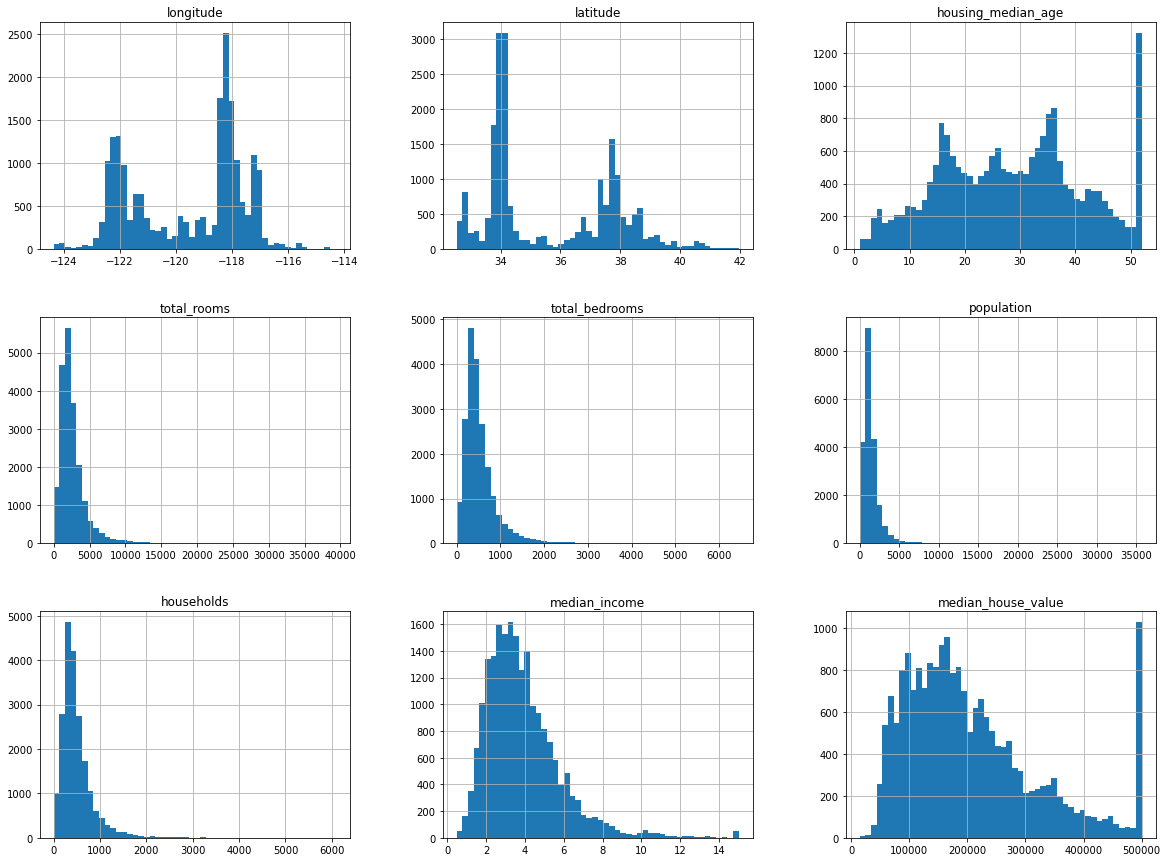

In [9]:
housing.hist(bins = 50, figsize = (20, 15))
#save_fig('attribute_histogram_plots')

plt.show()

從上圖可以觀察到以下幾點：
- median income 屬性不像是以美元來表示。確認後資料已被改尺度了，較高的收入中位數被限制在15，較低的收入中位數被限制為0.5
- housing_median_age 與 median_house_value 的最高/最低值被限制了。但後者目標屬性，因此可能會影響模型訓練，造成價格永遠不會超過該限制。這有兩種做法：
   - 為標籤有上下限的地區收集適當的標籤
   - 將訓練組的這些區域移除（包含測試組）
- 這些屬性的尺度有很大的差異
- 許多直方圖都有厚重的尾部，往中位數的右邊延伸的長度遠大於左邊

## 建立測試組

資料窺探（data snooping）偏差

data snooping bias

In [10]:
import numpy as np

# to make this notebook's output identical at every run
np.random.seed(42)

In [11]:
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(housing, 0.2)

In [13]:
len(train_set)

16512

In [14]:
len(test_set)

4128

前面的方法在再次運行該段程式時，會產生不同的測試組。解決的方法可以先在第一次執行時儲存測試組，在後續的執行時將之載入。或是可以設定亂數產生器的種子（如使用np.random.seed(42))，這樣可產生一組固定洗亂過的索引

當如果取得更新過的資料組時，上述的方法會失效

為取得穩定的訓練/測試組，即使更新資料組後也如此，常見的做法是使用各個實例的識別碼（若實例有唯一且不可變的識別碼）來決定是否將它放入測試組

下列做法是計算各個實例的識別碼的雜湊，並在雜湊小於或等於最大雜湊值的 20% 時，將那個實例放入測試組。這可確保測試組在多次執行間維持一致

新的測試組將包含 20% 的新實例，但將不包含之前已經在訓練組內的任何實例

In [15]:
from zlib import crc32

In [16]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 ** 32

If you want an implementation that supports any hash function and is compatible with both Python 2 and Python 3, here is one:

In [17]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

由於此資料集沒有識別碼欄位，因此解決方法是列索引當成 ID 來使用

In [18]:
housing_with_id = housing.reset_index()   # 加入一個 index 欄位

In [19]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [20]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


使用列索引當作唯一識別碼來使用，就必須將新資料附加到資料組的最後面，且不刪除任何資料列。若無法做到，可用最不可能改變的特徵來建立唯一的識別碼

下面利用地區的經緯度結合成 ID，因為經緯度資料是穩定的

In [21]:
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']

In [22]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')

In [23]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


使用 Scikit-Learn

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

分層抽樣（stratified sampling），將資料分成同質的子群體，稱為層（strata），並從各層中抽取正確數量的實例，來確保測試組能夠代表整體資料

<AxesSubplot:>

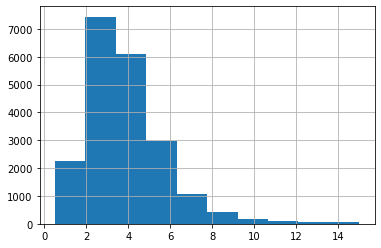

In [26]:
housing['median_income'].hist()

使用 pd.cut() 來建立一個分類屬性，裡面有五個種類（標記成 1 到 5）：分類 1 的範圍是 0 至 1.5，分類 2 從 1.5 至 3，.....

In [27]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels = [1, 2, 3, 4, 5])

In [28]:
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

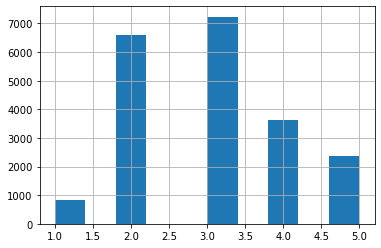

In [29]:
housing['income_cat'].hist()

根據收入分類進行分層抽樣，使用 Scikit-Learn 的 StratifiedShuffleSplit 類別

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit

In [31]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [32]:
strat_train_set['income_cat'].value_counts() / len(strat_test_set)

3    1.402374
2    1.275436
4    0.705184
5    0.457607
1    0.159399
Name: income_cat, dtype: float64

來評量完整的資料組內的收入分類比率

In [33]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts() / len(data)

In [34]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    'Overall': income_cat_proportions(housing),
    'Stratified': income_cat_proportions(strat_test_set),
    'Random': income_cat_proportions(test_set),
}).sort_index()

compare_props['Rand. %error'] = 100 * compare_props['Random'] / compare_props['Overall'] - 100
compare_props['Strat. %error'] = 100 * compare_props['Stratified'] / compare_props['Overall'] - 100

In [35]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


比較整體資料組，使用分層抽樣產生的測試組與純隨機抽樣產生的測試組內餓收入分類比率，可看到用分層抽樣的測試組收入分類比率與完整資料組幾乎一樣，而隨機抽樣產生的則有偏差

將 income_cat 屬性移除，使資料回到原始狀態

In [36]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis = 1, inplace = True)

# 發現資料並將它視覺化來取得見解

## 將地理資料視覺化

In [37]:
housing = strat_train_set.copy()

建立地區的散佈圖

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

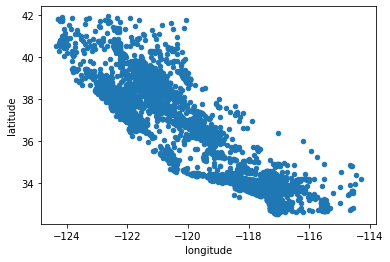

In [38]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude')

#save_fig("bad_visualization_plot")

alpha 設置為 0.1 可凸顯有高密度資料點的地方

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

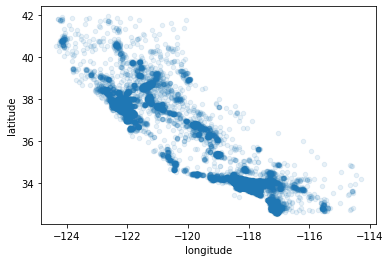

In [43]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)
#save_fig("better_visualization_plot")

每個圓的直徑表示地區的人口（選項s），顏色代表價格（選項c），色階圖（cmap）jet，範圍從藍色（低值）到紅色（高值）

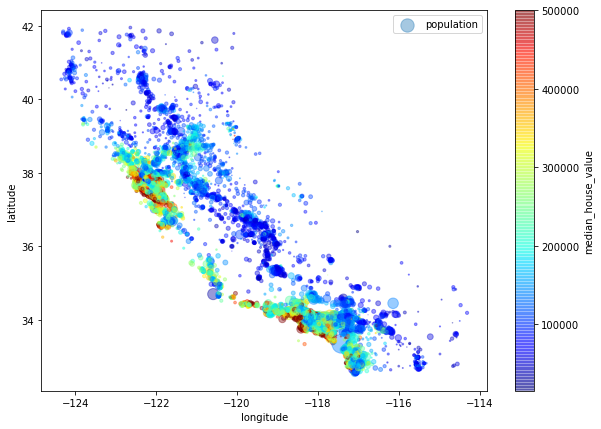

In [45]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
             s = housing['population'] / 100, label = 'Population', figsize = (10, 7),
             c = 'median_house_value', cmap = plt.get_cmap('jet'),
             colorbar = True, sharex = False)


plt.legend()
#save_fig('housing_prices_scatterplot')

背景套用圖片

In [46]:
import matplotlib.image as mpimg

<ipython-input-49-5f72b68e3a89>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["$%dk"%(round(v / 1000)) for v in tick_values], fontsize=14)


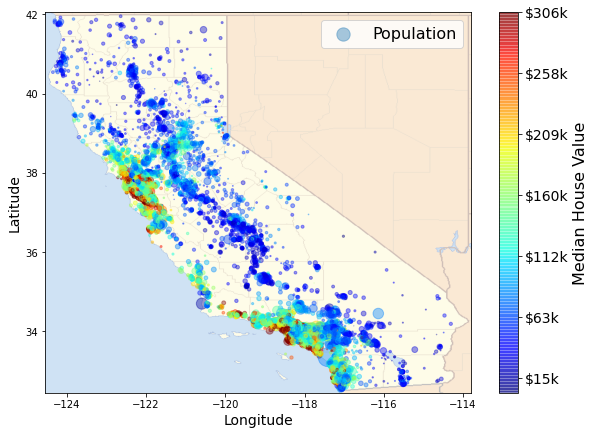

In [49]:
california_img = mpimg.imread('./images/end_to_end_project/california.png')

ax = housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', figsize = (10, 7),
                  s = housing['population'] / 100, label = 'Population',
                  c = 'median_house_value', cmap = plt.get_cmap('jet'),
                  colorbar = False, alpha = 0.4)

plt.imshow(california_img,
           extent = [-124.55, -113.80, 32.45, 42.05], 
           alpha = 0.5,
           cmap = plt.get_cmap('jet'))
plt.ylabel('Latitude', fontsize = 14)
plt.xlabel('Longitude', fontsize = 14)

prices = housing['median_house_value']
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v / 1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize = 16)

plt.show()

## 尋找相關性

使用 corr() 方法來計算每一對屬性間的標準相關性係數（也稱為 Pearson's r）

In [39]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [40]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

相關係數的範圍是 -1 到 1，接近 1，表示有強烈的正相關性，接近 -1，表示有強烈的負相關性

相關性只能衡量線性相關性

In [41]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
# 可以檢查屬性之間的相關性，會畫出每一個數值屬性與每一個其他數值屬性之間的關係
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

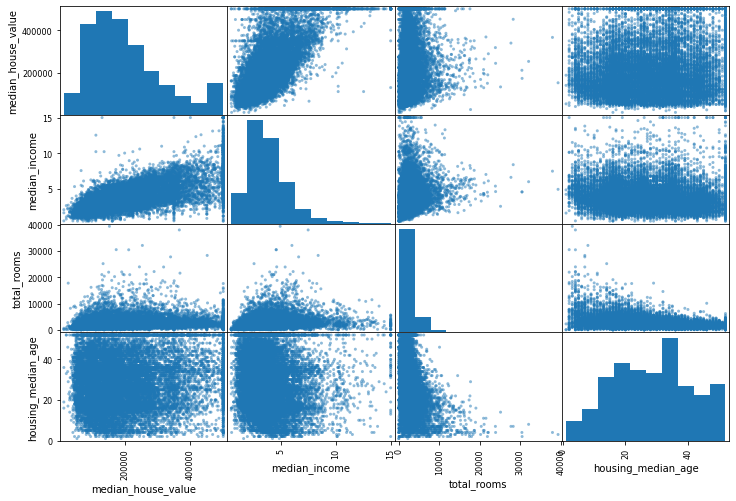

In [42]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize = (12, 8))

#save_fig("scatter_matrix_plot")

主對角線（從左上到右下）畫出每個屬性與自己的關係，原應該是一條直線，但 pandas 改成顯示每一個屬性的直方圖（可選擇其他圖表，可參考文件調整）

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

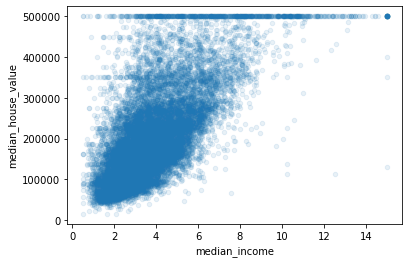

In [43]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)

## 用屬性組合進行實驗

In [44]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [45]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.028345,0.095603,-0.000410
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,0.107621,-0.116884,0.005420
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.147186,0.136788,0.015031
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.127519,-0.192606,-0.024810
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.000377,0.086960,-0.028370
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,-0.074692,0.037778,0.076225
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,-0.083009,0.067162,-0.027416
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.311563,-0.624674,0.021822
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.146285,-0.259984,-0.021985
rooms_per_household,-0.028345,0.107621,-0.147186,0.127519,0.000377,-0.074692,-0.083009,0.311563,0.146285,1.000000,-0.398546,-0.005314


In [46]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

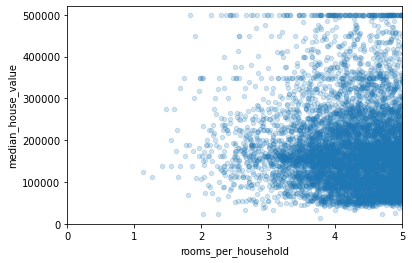

In [47]:
housing.plot(kind = "scatter", x = "rooms_per_household", y = "median_house_value", alpha = 0.2)
plt.axis([0, 5, 0, 520000])

plt.show()

In [48]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# 準備資料供機器學習演算法使用

In [49]:
housing = strat_train_set.drop('median_house_value', axis = 1) # drop labels for training set
housing_labels = strat_train_set['median_house_value'].copy()

## 清理資料

In [50]:
sample_incomplete_rows = housing[housing.isnull().any(axis = 1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


處理缺漏值，做法有三：
- 捨棄相應的區域
- 捨棄整個屬性
- 將那些直射為某些值（零、均值、中位數等）

1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.).

可以使用 DataFrame 的 dropna()、drop()、fillna()

In [51]:
sample_incomplete_rows.dropna(subset = ['total_bedrooms'])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [52]:
sample_incomplete_rows.drop('total_bedrooms', axis = 1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [53]:
median = housing['total_bedrooms'].median()
sample_incomplete_rows['total_bedrooms'].fillna(median, inplace = True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


Scikit-Learn 有個類別可以處理缺漏值

In [54]:
from sklearn.impute import SimpleImputer

In [55]:
imputer = SimpleImputer(strategy = 'median')

In [56]:
housing_num = housing.drop('ocean_proximity', axis = 1)   # 因為中位數只能用數值屬性計算出來，所以要建立一個不含文字屬性（ocean_proximity）的資料樣本
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [57]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

imputer 只是單存計算各個屬性的中位數，將結果存在 statistics_ 實例變數中

In [58]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [59]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [60]:
X = imputer.transform(housing_num)
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [61]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [62]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [63]:
imputer.strategy

'median'

In [64]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


## 處理文件與分類屬性

In [65]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


Ordinal Encoder

In [66]:
from sklearn.preprocessing import OrdinalEncoder

In [67]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [68]:
ordinal_encoder.categories_    # 取得分類清單

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

上述的方法有個問題是，演算法會架設兩個接近的執筆兩個離很遠的值來得相似，所以要看原始資料的性質是否就是有序分類的

One-hot Encoding

只有一個屬性會等於 1 其餘的都為 0，這些新屬性有時稱為虛擬（dummy）屬性

輸出的結果是個 SciPy 的稀疏矩陣，非 NumPy 陣列，可透過 toarray() 轉換成（密集）NumPy 陣列

In [69]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [71]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Alternatively, you can set sparse=False when creating the OneHotEncoder:

In [72]:
cat_encoder = OneHotEncoder(sparse = False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [73]:
cat_encoder.categories_   # 取得分類的串列

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

若分類屬性有大量可能的類別，則使用 one-hot 編碼將會產生大量輸入特徵，可能會影響順練速度，降低績效。遇到這種情況，可以將分類輸入換成對應類別的數值特徵，或將各個分類換成可學習、低維的數向量，成為 embedding，在訓練過程中學習各個分類的表示法

## 自訂轉換器

Let's create a custom transformer to add extra attributes:

In [82]:
from sklearn.base import BaseEstimator, TransformerMixin

In [83]:
# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [84]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns = list(housing.columns) + ['rooms_per_household', 'population_per_household'],
    index = housing.index)

housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.00885,2.707965
14650,-117.2,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.50581,3.047847


## 特徵縮放

特徵縮放（feature scaling）是最重要的資料轉換工作之一。可用兩主常見的方式讓所有屬性尺一致：min-max 縮放以及標準化（standardization）

min-max 縮放（可稱為正規化 normalization），對值進行平移和縮放，讓其範圍介在 0 至 1 之間。做法是減去最小值，再除以最大質檢最小值的結果

可用 Scikit-Learn 的 MinMaxScaler 轉換器來執行，它有一個 feature_range 超參數，可改變 0-1 這個範圍

標準化 Standardization 的做法是減去均值（所以標準化後的值的平均值永遠是零），再處以標準差，所得到的分佈有單位變異數（unit variance）。其值得範圍不會限定在特定領域內。標準化較不受離群值影響

可用 StandardScalar 轉換器來做標準化

## 轉換 pipeline

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [86]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy = 'median')),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [87]:
from sklearn.compose import ColumnTransformer

In [88]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attribs),
        ('cat', OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared 

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [89]:
housing_prepared.shape

(16512, 16)

# 選擇與訓練模型

## 用訓練組來訓練與評估

Linear Regression

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [92]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print('Predictions:', lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [93]:
print('Labels:', list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [94]:
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

使用 mean_squared_error() 函式來以整個訓練資料衡量整個回歸模型的 RMSE

In [95]:
from sklearn.metrics import mean_squared_error

In [96]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

另外使用 mean absolute error 來檢視一下

In [97]:
from sklearn.metrics import mean_absolute_error

In [98]:
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49439.89599001897

Decision Tree

In [99]:
from sklearn.tree import DecisionTreeRegressor

In [100]:
tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [101]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## 使用交叉驗證來做更好的評估

評估模型時，可使用 train_test_split() 函式將訓練組拆分一個較小的訓練組與驗證組，利用較小的訓練組來訓練模型，再用驗證組來評估。

也可以使用 K-fold 交叉驗證（K-fold cross-valdation），將訓練資料隨機拆分成 K 個不同的子集和，稱為 fold（折），再訓練與評估模型 K 次，每次選擇不同的一個 fold 來評估，而用其他的 K-1 個來訓練，這樣會產生一個陣列，裡面會有 K 個評估分數

In [104]:
from sklearn.model_selection import cross_val_score

In [105]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring = 'neg_mean_squared_error', cv = 10)  # K = 10
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([70194.33680785, 66855.16363941, 72432.58244769, 70758.73896782,
       71115.88230639, 75585.14172901, 70262.86139133, 70273.6325285 ,
       75366.87952553, 71231.65726027])

Scikit-Learn 的交叉驗證功能是收到一個效用函數（越大越好），而不是代價函數（越小越好），所以評估分數是 MSE 的相反，也就是負數值。因此上面先計算 -scores，在計算平方根

In [106]:
# 定義顯示內容的函式，顯示 K-fold 的每個 K 的值、平均值、標準差
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

In [107]:
display_scores(tree_rmse_scores)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


使用交叉驗證後，決策樹模型看起來沒有之前那麼好，表現比先前的線性回歸模型差，因此也將線性回歸模型來計算同一分數

In [108]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring = 'neg_mean_squared_error', cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798348


其結果確實顯示決策術模型過擬合了

Random Forest

隨機森林的運作方式是用隨機的特徵子集合來訓練許多決策樹，接著計算它們的預測平均值

用許多模型來建構模型稱為$整體學習（Ensemble Learning）$

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [110]:
forest_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
# n_estimators=100 to be future-proof since the default value is going to change to 100 in Scikit-Learn 0.22
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [111]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

In [112]:
# 使用 10-fold
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring = 'neg_mean_squared_error', cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean: 50182.303100336096
Standard deviation: 2097.0810550985693


直接將 K-fold 結果用 .describe() 來顯示基本統計結果

In [113]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69052.461363
std       2879.437224
min      64969.630564
25%      67136.363758
50%      68156.372635
75%      70982.369487
max      74739.570526
dtype: float64

Support Vector Regression

In [145]:
from sklearn.svm import SVR

In [146]:
svm_reg = SVR(kernel = 'linear')
svm_reg.fit(housing_prepared, housing_labels)

SVR(kernel='linear')

In [147]:
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

是用 joblib 可以有效地將大型 Numpy 陣列序列化，方便存入模型訓練的超參數與訓練後的參數，交叉驗證分數貨預測結果。以方便來回使用各個模型

In [ ]:
import joblib

In [ ]:
# 存入模型
joblib.dump(my_model, 'my_model.pkl')

In [ ]:
# 載入存入的模型
my_model_loaded = joblib.load('my_model.pkl')

# 微調模型

## 網格搜尋 Grid Search

透過 Scikit-Learn 的 GridSearchCV，來找出最好的參數組合，只要設定要試驗的超參數有哪些及所用的值，就會用交叉驗證來評估可能的超參數組合

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
# 找出 RandomForestRegressor 最佳超參數組合
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state = 42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

param_grid 讓 Scikit-Learn 先評估第一個字典內的 n_estimators 與 max_features 超參數值的 3X4=12 種組合，接著再是第二個字典內的所有 2X3=6 種超參數數組合，但是這一次將 boostrap 的超參數設為 False，非預設值的 True

GredSearch 會針對 RandomForestRegressor 超參數值的 12+6=18 種組合，並訓練各種模型 5 次（因為 cv = 5，5-fold交叉驗證）。總共要訓練 18X5=90 個回合

GridSearchCV() 中的參數 refit = True（預設值），當用交叉驗證找最佳估計器時，就會用整個訓練組來重新訓練它。這種做法通常較好，因為給它更多資料通常可以改善它的性能

檢視最佳的參數組合

In [116]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

直接得到最佳的估計器

In [117]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

取得評估分數

In [118]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [119]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.068515,0.007755,0.004082,0.000129,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.837622e+09,-4.147108e+09,...,-4.053756e+09,1.519591e+08,18,-1.064113e+09,-1.105142e+09,-1.116550e+09,-1.112342e+09,-1.129650e+09,-1.105559e+09,2.220402e+07
1,0.243014,0.046055,0.014295,0.006377,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.047771e+09,-3.254861e+09,...,-3.094374e+09,1.327062e+08,11,-5.927175e+08,-5.870952e+08,-5.776964e+08,-5.716332e+08,-5.802501e+08,-5.818785e+08,7.345821e+06
2,0.744094,0.065635,0.030127,0.001305,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.689185e+09,-3.021086e+09,...,-2.849913e+09,1.626875e+08,9,-4.381089e+08,-4.391272e+08,-4.371702e+08,-4.376955e+08,-4.452654e+08,-4.394734e+08,2.966320e+06
3,0.108801,0.005277,0.004357,0.000973,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.730181e+09,-3.786886e+09,...,-3.716847e+09,1.631510e+08,16,-9.865163e+08,-1.012565e+09,-9.169425e+08,-1.037400e+09,-9.707739e+08,-9.848396e+08,4.084607e+07
4,0.447136,0.084085,0.010969,0.000352,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.666283e+09,-2.784511e+09,...,-2.781618e+09,1.268607e+08,8,-5.097115e+08,-5.162820e+08,-4.962893e+08,-5.436192e+08,-5.160297e+08,-5.163863e+08,1.542862e+07
5,1.061855,0.074466,0.031641,0.002230,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.387153e+09,-2.588448e+09,...,-2.537883e+09,1.214614e+08,3,-3.838835e+08,-3.880268e+08,-3.790867e+08,-4.040957e+08,-3.845520e+08,-3.879289e+08,8.571233e+06
6,0.139303,0.003623,0.004124,0.000247,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.119657e+09,-3.586319e+09,...,-3.441458e+09,1.893056e+08,14,-9.245343e+08,-8.886939e+08,-9.353135e+08,-9.009801e+08,-8.624664e+08,-9.023976e+08,2.591445e+07
7,0.466141,0.003497,0.010398,0.000215,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.549663e+09,-2.782039e+09,...,-2.704645e+09,1.471569e+08,6,-4.980344e+08,-5.045869e+08,-4.994664e+08,-4.990325e+08,-5.055542e+08,-5.013349e+08,3.100456e+06
8,1.495264,0.118009,0.031819,0.002072,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.370010e+09,-2.583638e+09,...,-2.514673e+09,1.285080e+08,2,-3.838538e+08,-3.804711e+08,-3.805218e+08,-3.856095e+08,-3.901917e+08,-3.841296e+08,3.617057e+06
9,0.200869,0.017745,0.004144,0.000688,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.353504e+09,-3.348552e+09,...,-3.348850e+09,1.241939e+08,13,-9.228123e+08,-8.553031e+08,-8.603321e+08,-8.881964e+08,-9.151287e+08,-8.883545e+08,2.750227e+07


上面結果顯示，採用 max_features = 8, n_estimators = 30，這樣的組合其 RMSE 分數為 49,682 是最好的組合

Tips: 可將一些資料預處理步驟當成超參數來處理，這樣就可用來自動找出處理離群值或缺漏的特徵、選擇特徵等工作的最佳做法

## 隨機搜尋 Randomized Search

參數組合相對較小時，Grid Search 會是不錯的方法，但當組合的空間很大石，通常改用 RandomizedSearchCV，此方式是在每次迭代時，幫每一個超參數選擇一個隨機值，來評估所指定的隨機組合數量，此方法有兩大好處：
- 如果讓隨機話搜尋執行 1,000 次迭代，它會探索各個超參數的 1,000 個不同值（不像網格搜尋那樣，每個超參數只有一些值）  
  If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few val‐ ues per hyperparameter with the grid search approach).
- 只要設定迭代次數，就可更好地控制分配給超參數搜尋的計算預算  
  Simply by setting the number of iterations, you have more control over the com‐ puting budget you want to allocate to hyperparameter search.

In [120]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [121]:
param_distribs = {
        'n_estimators': randint(low = 1, high = 200),
        'max_features': randint(low = 1, high = 8),
    }

forest_reg = RandomForestRegressor(random_state = 42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions = param_distribs,
                                n_iter = 10, cv = 5, scoring = 'neg_mean_squared_error', random_state = 42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb3a270e1c0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb3a27244f0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [122]:
cvres = rnd_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


## 整體方法 Ensemble Methods

另一種 fine-tune 的方法是結合性能最好的模型，這個 ensemble 的執行績效通常會比個別模型來的好，特別是個別模型會產生不同的誤差種類時

## 分析最佳模型與它們的誤差

In [123]:
# 顯示各屬性的相對重要性
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [124]:
# 將重要性分數顯示在對應的屬性名稱旁
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

## 用測試組來評估系統

調整模型後，就可用測試組來評估最後的模型

這邊使用 full_pipeline 來轉換資料

In [126]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47730.22690385927

compute a 95% confidence interval for the test RMSE

In [127]:
from scipy import stats

In [128]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45685.10470776, 49691.25001878])

compute the interval manually 

In [129]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof = 1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45685.10470776014, 49691.25001877871)

use a z-scores rather than t-scores

In [133]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof = 1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45685.717918136594, 49690.68623889426)

# Extra material

## A full pipeline with both preparation and prediction

In [130]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

## Example SciPy distributions for `RandomizedSearchCV`

In [132]:
from scipy.stats import geom, expon

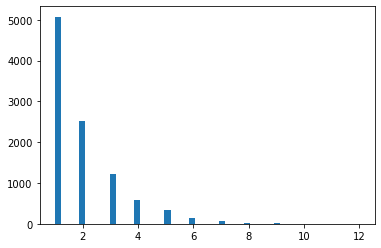

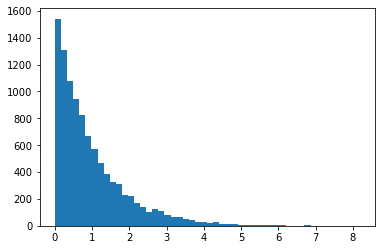

In [131]:
geom_distrib = geom(0.5).rvs(10000, random_state = 42)
expon_distrib = expon(scale = 1).rvs(10000, random_state = 42)
plt.hist(geom_distrib, bins = 50)

plt.show()

plt.hist(expon_distrib, bins=50)

plt.show()